# Analytical Detective
#### By John Bobo based on a problem set from MIT’s Analytics Edge MOOC
#### April 25, 2016


Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI).  Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward [online](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

Chicago is the third most populous city in the United States, with a population of over 2.7 million people.

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago. 

Please download the file [mvtWeek1.csv]( https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/mvtWeek1.csv) for this exploration (do not open this file in any spreadsheet software before completing this problem because it might change the format of the Date field). Here is a list of descriptions of the variables:

  * **ID**: a unique identifier for each observation  
  * **Date**: the date the crime occurred  
  * **LocationDescription**: the location where the crime occurred  
  * **Arrest**: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)    
  * **Domestic**: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)  
  * **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.  
  * **District**: the police district in which the crime occurred. Each district is composed of many beats, and are defined by the Chicago Police Department.  
  * **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.   
  * **Year**: the year in which the crime occurred.  
  * **Latitude**: the latitude of the location at which the crime occurred.  
  * **Longitutde**: the longitude of the location at which the crime occurred.

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

in_file = '/Users/johnbobo/analytics_edge/data/mvtWeek1.csv'
mvt = pd.read_csv(in_file, low_memory=False)


In [2]:
mvt.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


**How many observations does our dataset hold?**

In [3]:
mvt.shape[0]

191641

**How many variables are in this dataset?**

In [4]:
mvt.shape[1]

11

**What is the maximum values for the variable `ID`?**

In [5]:
max(mvt.ID)

9181151

**What is the minimum value of the variable `Beat`?**

In [6]:
min(mvt.Beat)

111

**How many observations have value `True` in the `Arrest` variable?**

In [7]:
sum(mvt.Arrest == True)

15536

**How many observations have a LocationDescription value of `ALLEY`?**

In [8]:
sum(mvt.LocationDescription == "ALLEY")

2308

## Understanding Dates

**In what format are the entries in the variable Date?**

In [9]:
type(mvt.Date[0])

str

Now, let's convert these characters into a date object in python.

In [10]:
mvt['Date'] = pd.to_datetime(mvt['Date'])

**What is the month and year of the median date in our dataset?**

In [11]:
(mvt['Date'][mvt.shape[0]/2]).strftime('%B %Y')

'May 2006'

Now, let’s extract the month and the day of the week, and add these variables to our data frame mvt. We can do this with two simple functions.

In [12]:
months = pd.to_datetime(pd.DatetimeIndex(mvt.Date).month, format = '%m')
mvt['Month'] = months.strftime('%B')

weekdays = pd.DatetimeIndex(mvt.Date).dayofweek
mvt['Weekday'] = mvt[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)

**In which month did the fewest motor vehicle thefts occur?**

In [13]:
mvt.Month.value_counts().tail(1)

February    13511
Name: Month, dtype: int64

**On which weekday did the most motor vehicle thefts occur**?

In [14]:
mvt.Weekday.value_counts().head(1)

Friday    29284
Name: Weekday, dtype: int64

**Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?**

In [15]:
mvt[mvt.Arrest == True].groupby('Month').agg({'Arrest':'sum'})\
                                                .sort_values('Arrest', ascending = False)

,Arrest
Month,
January,1435.0
December,1397.0
October,1342.0
August,1329.0
July,1324.0
March,1298.0
November,1256.0
April,1252.0
September,1248.0


**Answer**: January

## Visualizing Crime Trends
Now let's make some plots to help us better understand how crime has changed over time in Chicago. 

First, let's make a histogram of the variable `Date`.

In [16]:
mvt = mvt.set_index(mvt.Date)

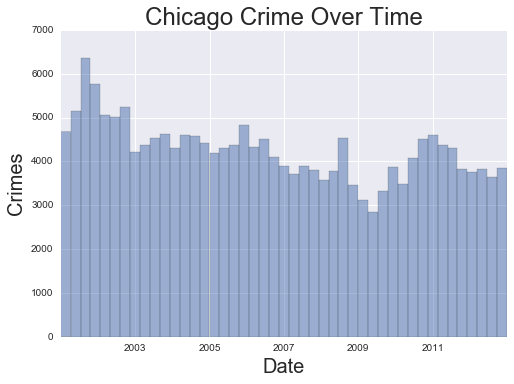

In [17]:
mvt.Date.hist(alpha=0.5, bins=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Crimes', fontsize=20)
plt.title('Chicago Crime Over Time', fontsize=24);

While there isn’t a clear trend it appears crime decreases from 2002 - 2012 with an upward trend from 2009 - 2011.

Now, let’s see how arrests have changed over time. We’ll create a boxplot of the variable “Date”, sorted by the variable “Arrest”.

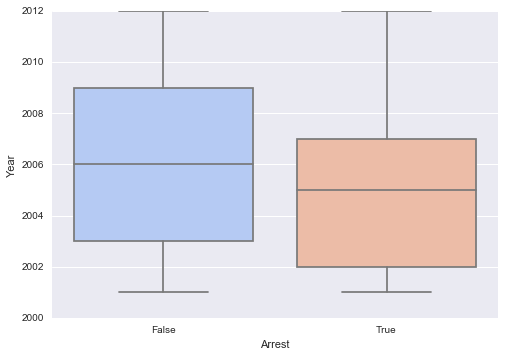

In [18]:
sns.boxplot(x=mvt.Arrest, y=mvt.Year, palette='coolwarm');

From our boxplot, we see that where Arrest = TRUE is towards the bottom of the plot which implies over the first half of the time considered, more arrests were made.

**For what proportion of motor vehichle thefts in 2001 was an arrest made?**

In [19]:
mvt.groupby('Year').agg({'Arrest': 'mean'}).head(1)

,Arrest
Year,
2001,0.104117


## Popular Locations

Analyzing this data could be useful to the Chicago Police Department when deciding where to allocate resources. If they want to increase the number of arrests that are made for motor vehicle thefts, where should they focus their efforts?

We want to find the top five locations where motor vehicle thefts occur. Ignore the `OTHER` category

In [20]:
mvt.LocationDescription.value_counts()[0:6]

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

Now we’ll create a subset of our data, only taking observations for which the theft happened in one of these five locations, and call this new data set “top5”.

In [21]:
top5_list = ['STREET','PARKING LOT/GARAGE(NON.RESID.)', \
             'ALLEY','GAS STATION', 'DRIVEWAY - RESIDENTIAL']
top5 = mvt[mvt.LocationDescription.isin(top5_list)]

We'll use the top5 dataframe to answer the remaining questions

**One of the locations has a much higher arrest rate than the other locations. Which is it?**

In [22]:
top5.groupby('LocationDescription').agg({'Arrest':'mean'}).sort_values('Arrest', ascending=False)

,Arrest
LocationDescription,
GAS STATION,0.207958
PARKING LOT/GARAGE(NON.RESID.),0.107932
ALLEY,0.107886
DRIVEWAY - RESIDENTIAL,0.078806
STREET,0.074059


**On which day of the week do the most motor vehicle thefts at gas stations happen?**

In [23]:
top5[top5.LocationDescription == 'GAS STATION'].groupby('Weekday')\
                    .agg({'Arrest':'count'}).sort_values('Arrest', ascending=False)

,Arrest
Weekday,
Saturday,338
Sunday,336
Friday,332
Thursday,282
Monday,280
Wednesday,273
Tuesday,270
